<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Module" data-toc-modified-id="Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Module</a></span></li><li><span><a href="#S&amp;P500-rate-From-1985" data-toc-modified-id="S&amp;P500-rate-From-1985-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>S&amp;P500 rate From 1985</a></span></li><li><span><a href="#S&amp;P500-rate-of-return-by-Sector" data-toc-modified-id="S&amp;P500-rate-of-return-by-Sector-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>S&amp;P500 rate of return by Sector</a></span></li></ul></div>

## Module

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np

## S&P500 rate From 1985

In [154]:
 t

[*********************100%***********************]  2 of 2 completed


In [155]:
result_mon['month_start'] = result_mon.groupby([result_mon['Date'].dt.year, result_mon['Date'].dt.month])['Date'].transform('min')
result_mon = result_mon.drop_duplicates(subset='month_start', keep='first')
result_mon.rename(columns=dict(zip([c for c in result_mon.columns if 'Close_' in c], ticker_usd)), inplace=True)
result_mon.rename(columns={'Date':'Date_USD'}, inplace=True)
result_mon = result_mon.rename(columns={'^GSPC':'S&P500', '^SP500TR': 'S&P500TR'})
result_mon['Date_USD'] = result_mon['Date_USD'].dt.strftime('%Y-%m-%d')
result_mon['month_start'] = result_mon['month_start'].dt.strftime('%Y-%m-%d')
result_mon.reset_index(drop=True, inplace=True)

In [156]:
result_year['year_end'] = result_year.groupby([result_year['Date'].dt.year])['Date'].transform('max')
result_year = result_year.drop_duplicates(subset='year_end', keep='last')
result_year.rename(columns=dict(zip([c for c in result_year.columns if 'Close_' in c], ticker_usd)), inplace=True)
result_year.rename(columns={'Date':'Date_USD'}, inplace=True)
result_year = result_year.rename(columns={'^GSPC':'S&P500', '^SP500TR': 'S&P500TR'})

result_year['Date_USD'] = result_year['Date_USD'].dt.strftime('%Y-%m-%d')
result_year['year_end'] = result_year['year_end'].dt.strftime('%Y-%m-%d')
result_year.reset_index(drop=True, inplace=True)

In [158]:
with pd.ExcelWriter("SP500stock.xlsx", engine='xlsxwriter') as writer:
    result_mon.to_excel(writer, sheet_name='month', index=False)
    result_year.to_excel(writer, sheet_name='year', index=False)

In [129]:
result_mon

,Date_USD,S&P500,S&P500TR,month_start
0,1988-01-04,255.940002,256.019989,1988-01-04
1,1988-02-01,255.039993,255.509995,1988-02-01
2,1988-03-01,267.220001,269.440002,1988-03-01
3,1988-04-04,256.089996,258.410004,1988-04-04
4,1988-05-02,261.559998,264.329987,1988-05-02
...,...,...,...,...
439,2024-08-01,5446.680176,11887.540039,2024-08-01
440,2024-09-03,5528.930176,12084.570312,2024-09-03
441,2024-10-01,5708.750000,12490.870117,2024-10-01
442,2024-11-01,5728.799805,12545.400391,2024-11-01


In [113]:

result_year.reset_index(drop=True, inplace=True)

In [110]:
result_year

,Date_USD,S&P500,S&P500TR,year_end
15064,1988-01-29,257.070007,257.470001,1988-01-29
15084,1988-02-29,267.820007,269.480011,1988-02-29
15107,1988-03-31,258.890015,261.149994,1988-03-31
15127,1988-04-29,261.329987,264.040009,1988-04-29
15148,1988-05-31,262.160004,266.320007,1988-05-31
...,...,...,...,...
24282,2024-08-30,5648.399902,12344.429688,2024-08-30
24302,2024-09-30,5762.479980,12608.070312,2024-09-30
24325,2024-10-31,5705.450195,12493.740234,2024-10-31
24345,2024-11-29,6032.379883,13227.129883,2024-11-29


In [83]:
result.to_excel("SP500stock.xlsx", index=False)

## S&P500 rate of return by Sector

In [16]:
# Communication Services XLC : 통신 - 통신, 방송, 엔터
# Consumer Discretionary XLY : 임의소비재 - 자동차, 내구제, 서비스, 유통
# Consumer Staples XLP : 필수소비재 - 식료품 소매, 식음료, 개인용품
# Energy XLE : 에너지 - 에너지 장비 및 서비스, 오일, 가스
# Financials XLF : 금융 - 은행, 금융기관, 보험
# Heath Care XLV : 의료 - 의료장비 및 서비스, 의약 및 생명과학
# Industrials XLI : 산업 - 자본재, 상업서비스, 운송
# Materials XLB : 재료 - 화학, 건자재, 포장용기, 금속, 광물, 목재
# Real Estate XLRE : 부동산 - 리츠, 부동산 개발 및 관리
# Technology XLK : 정보기술- 반도체, 소프트웨어, 기술장비
# Utilities XLU : 유틸리트 - 전기, 가스, 수도

In [38]:
ticker_usd = ['^GSPC', 'XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLRE', 'XLK', 'XLU']
result=yf.download(ticker_usd,start = '2024-01-01')
result.columns = ['_'.join(c) for c in result.columns]
result = result.reset_index()
result['Date'] = result['Date'].dt.strftime('%Y-%m-%d')
result['Date'] = pd.to_datetime(result['Date'])

remain_cols = []
for t in ticker_usd:
    remain_cols.append(f"Close_{t}")

result = result[['Date']+remain_cols]
df = result.dropna()

[*********************100%***********************]  12 of 12 completed


In [62]:
# ISO Calendar를 사용해 'Year'와 'Week'를 추가
df['Year'], df['Week'], _ = zip(*df['Date'].map(lambda x: x.isocalendar()))

# 각 'Year'와 'Week'별로 마지막 Price 선택
df.groupby(['Year', 'Week']).last().reset_index()


,Year,Week,Date,Close_^GSPC,Close_XLC,Close_XLY,Close_XLP,Close_XLE,Close_XLF,Close_XLV,Close_XLI,Close_XLB,Close_XLRE,Close_XLRE,Close_XLK,Close_XLU
0,2024,1,2024-01-05,4697.240234,72.040001,172.619995,72.010002,84.680000,37.750000,139.119995,111.430000,84.339996,39.290001,39.290001,184.119995,64.529999
1,2024,2,2024-01-12,4783.830078,73.809998,173.960007,72.800003,82.680000,37.599998,140.520004,112.110001,83.449997,39.540001,39.540001,192.240005,63.320000
2,2024,3,2024-01-19,4839.810059,74.830002,174.889999,72.050003,80.169998,37.930000,139.460007,112.449997,82.230003,38.700001,38.700001,200.169998,60.980000
3,2024,4,2024-01-26,4890.970215,77.680000,171.679993,72.629997,84.250000,38.650002,139.270004,113.430000,82.510002,38.490002,38.490002,201.750000,61.209999
4,2024,5,2024-02-02,4958.609863,79.739998,177.320007,74.169998,83.519997,38.980000,141.990005,115.580002,83.089996,38.310001,38.310001,202.240005,61.490002
5,2024,6,2024-02-09,5026.609863,79.169998,179.899994,73.110001,83.309998,39.080002,144.009995,116.949997,83.139999,38.410000,38.410000,207.839996,60.270000
6,2024,7,2024-02-16,5005.569824,78.949997,179.020004,73.279999,85.570000,39.630001,145.619995,118.029999,85.169998,38.349998,38.349998,202.570007,61.230000
7,2024,8,2024-02-23,5088.799805,79.720001,181.289993,74.779999,85.959999,40.299999,147.860001,120.220001,86.830002,38.720001,38.720001,205.289993,61.959999
8,2024,9,2024-03-01,5137.080078,80.019997,185.020004,74.459999,87.139999,40.290001,146.339996,121.519997,87.959999,39.540001,39.540001,210.759995,61.720001
9,2024,10,2024-03-08,5123.689941,79.589996,180.309998,75.160004,88.169998,40.619999,146.429993,122.300003,89.349998,40.169998,40.169998,207.350006,63.750000


In [77]:
pd.concat(df[['Year', 'Week']], np.round(df[cols['ticker']].pct_change()*100, 2))

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [82]:
df_sector = pd.concat([df[['Year', 'Week']], np.round(df[cols['ticker']].pct_change()*100, 2)], axis=1)

In [88]:
df_sector = df_sector.groupby(['Year', 'Week']).last().reset_index()

In [103]:
df_sector_maxWeek = df_sector[
    (df_sector['Year'] == df_sector['Year'].max())
    & (df_sector['Week'] == df_sector['Week'].max())
]

In [104]:
df_sector_maxWeek

,Year,Week,Close_^GSPC,Close_XLC,Close_XLY,Close_XLP,Close_XLE,Close_XLF,Close_XLV,Close_XLI,Close_XLB,Close_XLRE,Close_XLRE,Close_XLRE,Close_XLRE,Close_XLK,Close_XLU
46,2024,47,0.53,-0.26,0.18,1.08,0.81,1.27,0.8,1.25,1.22,0.67,0.67,0.67,0.67,1.02,1.74


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df_sector_maxWeek[cols['ticker']].values

array([[ 0.53, -0.26,  0.18,  1.08,  0.81,  1.27,  0.8 ,  1.25,  1.22,
         0.67,  0.67,  0.67,  0.67,  0.67,  0.67,  0.67,  0.67,  1.02,
         1.74]])

In [122]:
melt_df = pd.melt(df_sector_maxWeek, id_vars=['Year', 'Week'], var_name='Category', value_name='Value')

In [129]:
melt_df['Category'] = melt_df['Category'].apply(lambda x: x[6:])

In [135]:
melt_df['Category'] = melt_df['Category'].replace('^GSPC', 'S&P500')

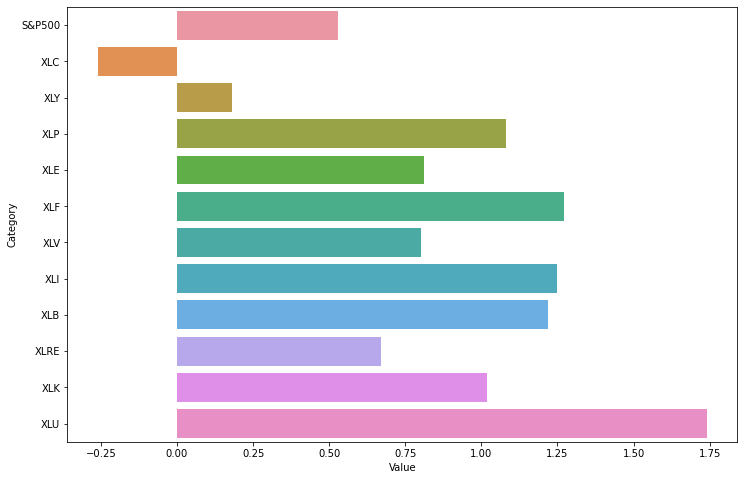

In [142]:
plt.figure(figsize=(12, 8))
sns.barplot(data = melt_df, y='Category', x='Value')
plt.show()

In [100]:
df_sector['Year'].max()

2024

In [73]:
np.round(df[cols['ticker']].pct_change()*100, 2)

,Close_^GSPC,Close_XLC,Close_XLY,Close_XLP,Close_XLE,Close_XLF,Close_XLV,Close_XLI,Close_XLB,Close_XLRE,Close_XLRE,Close_XLRE,Close_XLRE,Close_XLK,Close_XLU
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.80,-0.37,-2.02,-0.78,1.63,-0.85,-0.17,-1.49,-1.08,-2.37,-2.37,-2.37,-2.37,-1.02,0.37
2,-0.34,-0.33,-0.70,-0.14,-1.75,0.40,0.50,0.13,-0.32,-0.25,-0.25,-0.25,-0.25,-0.73,-0.31
3,0.18,0.42,0.16,-0.22,0.08,0.43,-0.09,0.12,0.17,-0.20,-0.20,-0.20,-0.20,-0.03,0.37
4,1.41,1.55,1.70,0.74,-1.16,0.64,0.88,0.66,0.43,1.37,1.37,1.37,1.37,2.51,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-1.32,-2.00,-0.85,-0.88,-0.15,0.46,-1.85,-0.54,-0.70,0.12,0.12,0.12,0.12,-2.48,1.50
222,0.39,0.99,0.92,0.70,1.33,0.30,0.07,-0.14,0.78,0.88,0.88,0.88,0.88,0.32,0.87
223,0.40,0.66,0.07,0.14,-0.64,-0.66,-0.51,-0.09,-0.33,0.42,0.42,0.42,0.42,0.82,0.64
224,0.00,0.64,-0.44,-0.51,1.01,-0.30,1.18,0.11,0.82,-0.16,-0.16,-0.16,-0.16,-0.09,0.05


In [65]:
df['Close_XLY'].pct_change()*100

0           NaN
1     -2.020879
2     -0.702887
3      0.156652
4      1.703164
         ...   
221   -0.854699
222    0.922977
223    0.074279
224   -0.440698
225    0.177059
Name: Close_XLY, Length: 226, dtype: float64

In [66]:
cols = {}
cols['ticker'] = [c for c in df.columns if 'Close' in c]

In [67]:
cols['ticker']

['Close_^GSPC',
 'Close_XLC',
 'Close_XLY',
 'Close_XLP',
 'Close_XLE',
 'Close_XLF',
 'Close_XLV',
 'Close_XLI',
 'Close_XLB',
 'Close_XLRE',
 'Close_XLRE',
 'Close_XLK',
 'Close_XLU']